# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    return (x**2)*numpy.sin(x);

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    return 2*x*numpy.sin(x)-((x**2)-2)*numpy.cos(x)-2;

Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    return g(xmax) - g(xmin);

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [9]:
def integrate_numeric(xmin, xmax, N):
    a = (xmax - xmin)/N
    s = 0
    x = xmin
    for i in range(1,N+1):
        s += 2*f(x + i*a) + 4*f(x + i*a - 0.5*a)
    return (a/6)*(s + f(xmin) - f(xmax));

Make sure you have implemented Simpson's rule correctly:

In [10]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Fractional error between difference in numeric and analytic integration methods for increasing panel counts')

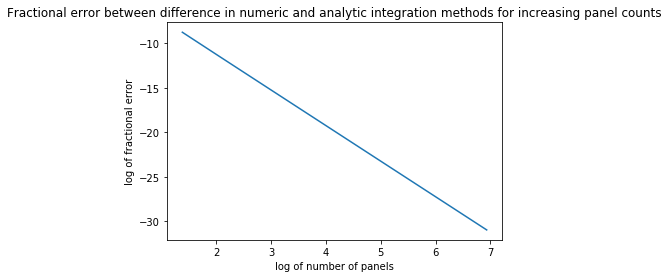

In [20]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = [integrate_analytic(x0, x1) for n in panel_counts]
result_numeric = [integrate_numeric(x0,x1,n) for n in panel_counts]
fractional_error = numpy.divide(abs(numpy.subtract(result_numeric,result_analytic)),result_analytic)
plt.plot(numpy.log(panel_counts),numpy.log(fractional_error))
plt.xlabel('log of number of panels')
plt.ylabel('log of fractional error')
plt.title('Fractional error between difference in numeric and analytic integration methods for increasing panel counts')

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

As the number of panels is increased the fractional error goes down such that the change in the natural log of the fractional error is proportional to the change in the natural log of the number of panels. However, when N is very large (>2000) the graph deviates from the linear fit and eventually starts to have a positive gradient so appears to behave parabolically. 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

On a graph of integration error against N, the error for the Simpson rule is always lower than for the trapezium rule because for N=1 the Simpson rule yields a lower error and then decreases at a faster rate as N increases. This is because the error in the integral is given by N^-4 while under the trapezium rule the error is given by N^-2. 